-0.65625
-0.53125
-0.78125
-0.6875
-0.625
0.0
0.0
0.0
0.0
0.0


C:\Users\chiao6673\AppData\Local\Temp\ipykernel_6556\1604387510.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[k].set_yticklabels(labels)


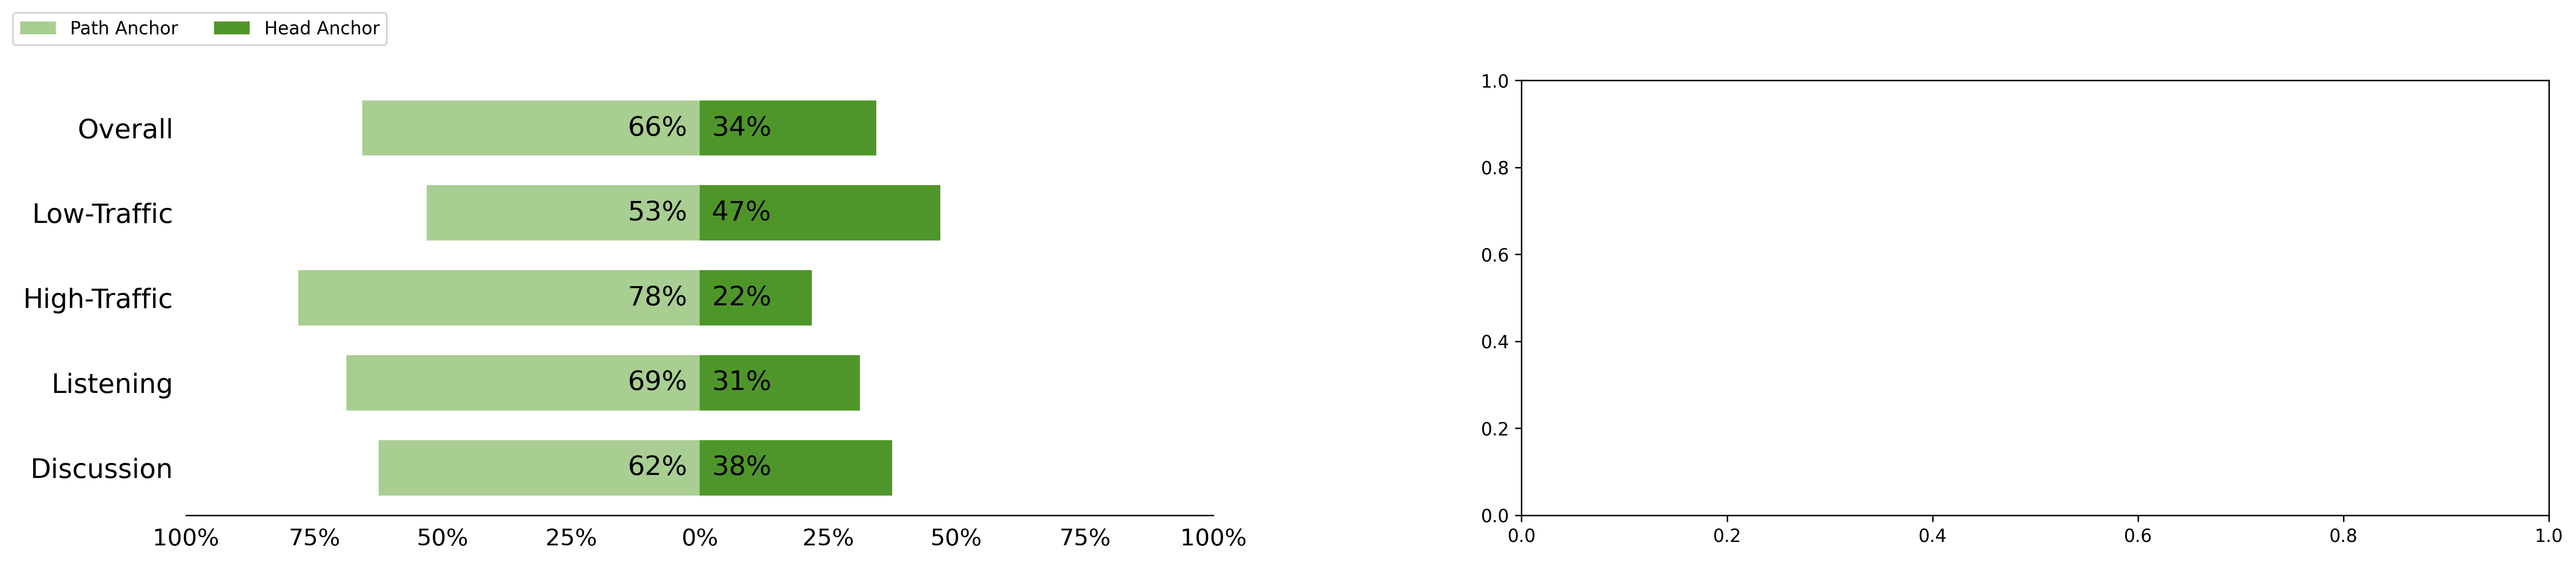

In [2]:
## Naive User Plot ##
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

import pandas as pd

all= pd.read_csv('../AnchorPreference.csv')
# print(all)
# print(all[(all['Environment']==0)])
# all = np.array(worksheet.get_all_values()[1:])
# print(all)
# user_count = all.shape[0]
# print(f"user_count = {user_count}")
score_start = 0
score_end = 1
import collections
def user_counting(data_column):
  # print(data_column)
  count_list = []
  for i in range(score_start, score_end + 1 ):
    count_list.append(data_column.count(i))
    # print(f"i = {i}, {data_column.count(i)}")
    # print(f"count_list = {count_list}")
  user_num = sum(count_list)
  # print(f"user_num = {user_num}")
  for i in range(score_end - score_start + 1):
    count_list[i] = count_list[i] / user_num
    # print(f"count_list{i} = {count_list[i]}")
  # A_sum = sum(count_list[:5])
  # B_sum = sum(count_list[5:])

  return count_list


category_names = ['Path Anchor', 'Head Anchor']
real_data = {
    'Overall': user_counting(all['Anchor'].tolist()),
    'Low-Traffic': user_counting(all[(all['Environment']==0)]['Anchor'].tolist()),
    'High-Traffic': user_counting(all[(all['Environment']==1)]['Anchor'].tolist()),
    'Listening': user_counting(all[(all['Meeting Format']==0)]['Anchor'].tolist()),
    'Discussion': user_counting(all[(all['Meeting Format']==1)]['Anchor'].tolist())
}
empty_data = {
    'Overall': user_counting(all['Anchor'].tolist()),
    'Low-Traffic': user_counting(all[(all['Environment']==0)]['Anchor'].tolist()),
    'High-Traffic': user_counting(all[(all['Environment']==1)]['Anchor'].tolist()),
    'Listening': user_counting(all[(all['Meeting Format']==0)]['Anchor'].tolist()),
    'Discussion': user_counting(all[(all['Meeting Format']==1)]['Anchor'].tolist())
}

results = [real_data]

def survey(results, category_names):

    fig, axes = plt.subplots(1,2, figsize=(20, 4), dpi=300)

    for k in range(1):
      labels = list(results[k].keys())
      data = np.array(list(results[k].values()))
      # print(f"data = {data}")
      data_cum = data.cumsum(axis=1)
      #print(f"data_cum = {data_cum}")
      middle_index = data.shape[1]//2
      offsets = data[:, range(middle_index)].sum(axis=1)

      # Color Mapping
      # colors = np.flip(sns.diverging_palette(250, 20, n=data.shape[1]), 0)
      colors = ["#a9ce91", "#4f962a"]
      # print(f"colors = {colors}")
      # Plot Bars
      for i, (colname, color) in enumerate(zip(category_names, colors)):
          widths = data[:, i]
          starts = data_cum[:, i] - widths - offsets
          f = -0.87 if i == 0 else -0.73
          ha = 'left' if i == 0 else 'right'
          
          for w in range(len(widths)):
            print(starts[w])
            plt.text(f, 0.89-0.195*w, f'{round(widths[w]*100)}%', ha=ha, va='center',  color="black", size=15)
            # plt.text(f, 0.89-0.195*w-widths, f'{int(widths[w]*100)}%', ha=ha, va='center', fontweight='bold', color="white", size=16)
          
          # print(f"data_cum = {data_cum[:,i]}")
          # print(f"width = {widths}")
          # print(f"offsets = {offsets}")
          # print(f"starts = {starts}")
          rects = axes[k].barh(labels, widths, left=starts, height=0.65,
                          label=colname, color=color)

      # Add Zero Reference Line
      # axes[k].axvline(0, linestyle='--', color='black', alpha=.5)

      # X Axis
      axes[k].set_xlim(-1., 1.)
      axes[k].set_xticks(np.arange(-1., 1.25, 0.25))
      # axes[k].xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
      axes[k].set_xticklabels(['100%', '75%', '50%', '25%', '0%', '25%', '50%', '75%', '100%'])
      axes[k].set_yticklabels(labels)
      axes[k].tick_params(axis='x', which='both', color=[0,0,0,0], labelsize=13)
      axes[k].tick_params(axis='y', which='both', color=[0,0,0,0], labelsize=15)

      # Y Axis
      axes[k].invert_yaxis()

      # Remove spines
      axes[k].spines['right'].set_visible(False)
      axes[k].spines['top'].set_visible(False)
      axes[k].spines['left'].set_visible(False)

    # Legend
    # fig.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
    #         loc='lower left', fontsize='medium', numpoints=3).set_zorder(3)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='medium').set_zorder(3)

    # Set Background Color
    # fig.set_facecolor('#FFFFFF')

    return fig, axes

fig, axes = survey(results, category_names)
fig.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=-3)


user_count = 4


<ipython-input-46-bab595df956c>:103: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[k].set_yticklabels(labels)


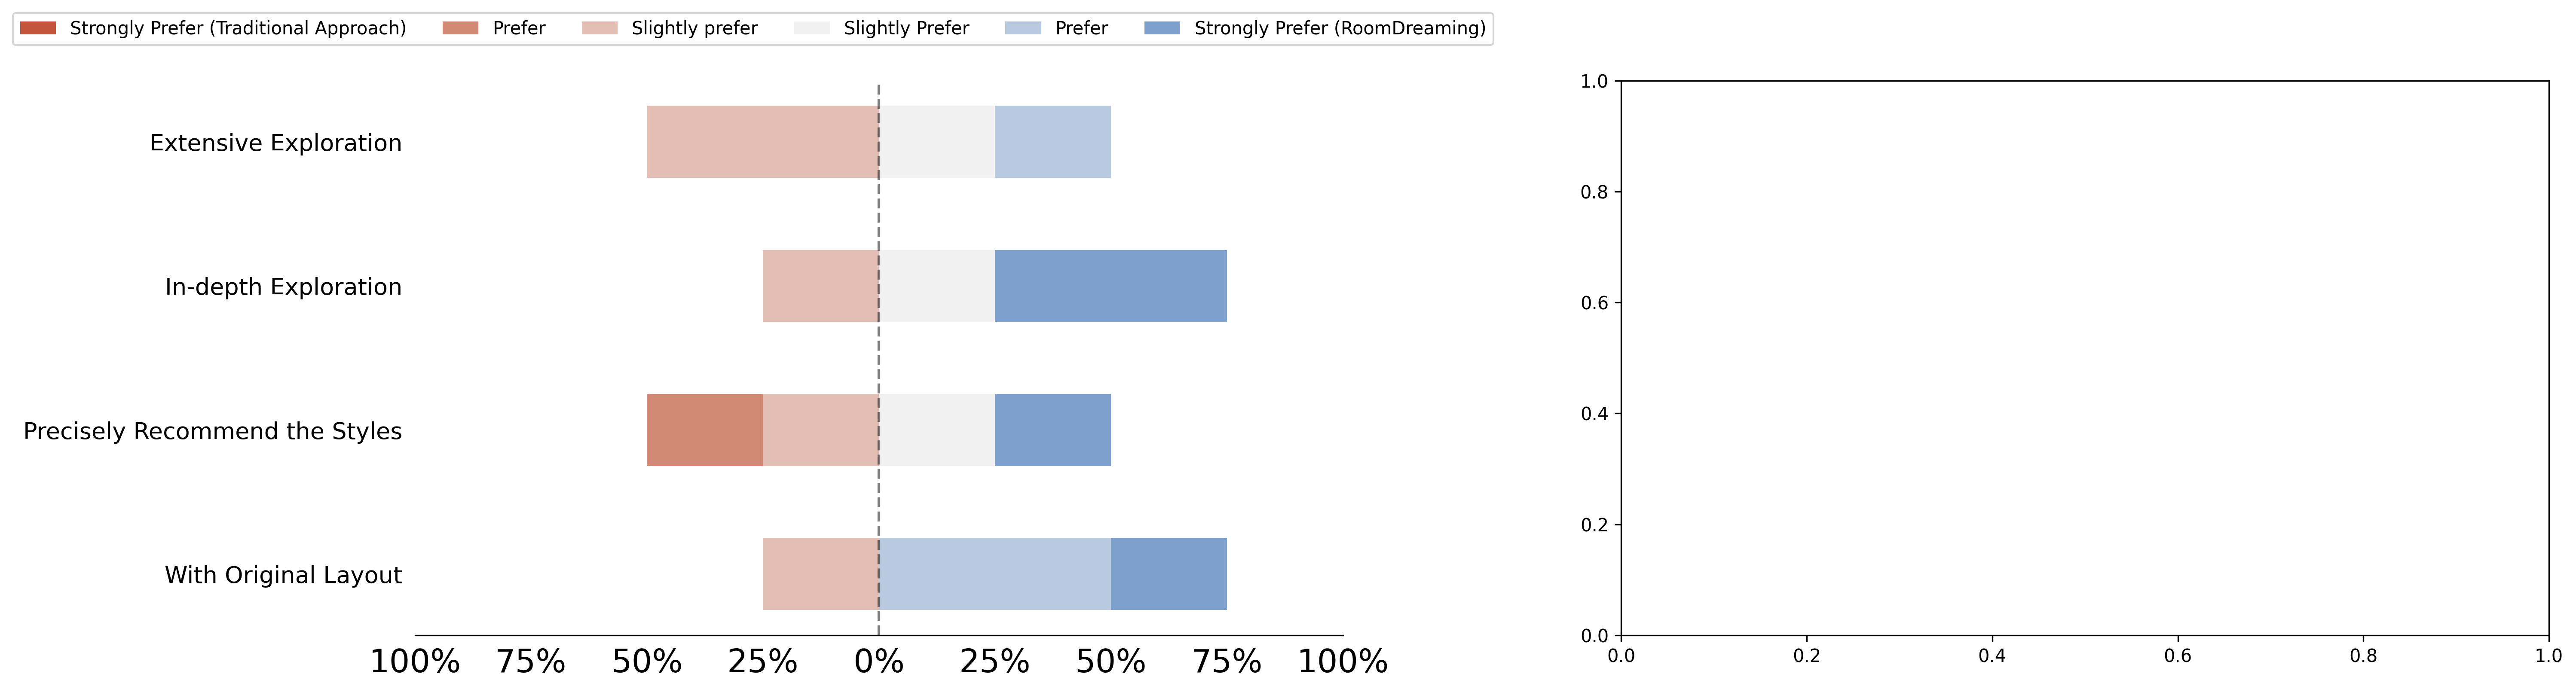

In [ ]:
## Expert User Plot ##
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns

from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

# https://docs.google.com/spreadsheets/d/1fFHfnDlkelgVRbwna3_vo4HbYQIdudhxI0KT2U_1UkA/edit#gid=1833831314
worksheet = gc.open_by_key('1fFHfnDlkelgVRbwna3_vo4HbYQIdudhxI0KT2U_1UkA').worksheet("AdditionalQuestionsPlotsExpert")

datas = np.array(worksheet.get_all_values()[1:5])
user_count = datas.shape[0]
print(f"user_count = {user_count}")
score_start = 1
score_end = 7
import collections
def user_counting(data_column):
  counter = collections.Counter(data_column)
  # print(f"counter = {counter}")
  count_list = []
  #count sum of the vote in each category and store in user_num
  for i in range(score_start, score_end + 1 ):
    count_list.append(counter.get(str(i), 0))
    # print(f"i = {i}, {counter.get(str(i), 0)}")
    # print(f"count_list = {count_list}")
  user_num = sum(count_list)
  # print(f"user_num = {user_num}")
  for i in range(score_end - score_start + 1):
    count_list[i] = count_list[i] / user_num
    # print(f"count_list{i} = {count_list[i]}")
  # A_sum = sum(count_list[:5])
  # B_sum = sum(count_list[5:])
  # print(count_list)
  return count_list


category_names = ['Strongly Prefer (Traditional Approach)', 'Prefer', 'Slightly prefer', 'Slightly Prefer', 'Prefer', 'Strongly Prefer (RoomDreaming)']
real_data = {
    'Extensive Exploration': user_counting(datas[:,     1]),
    'In-depth Exploration': user_counting(datas[:, 2]),
    'Precisely Recommend the Styles': user_counting(datas[:,         3]),
    'With Original Layout': user_counting(datas[:,     4])
}
empty_data = {
    'Extensive Exploration': user_counting(datas[:,     1]),
    'In-depth Exploration': user_counting(datas[:, 2]),
    'Precisely Recommend the Styles': user_counting(datas[:,         3]),
    'With Original Layout': user_counting(datas[:,     4])
}


# attack = {
#     'Extensive Exploration': user_counting(datas[:,     5]),
#     'In-depth Exploration': user_counting(datas[:, 6]),
#     'Precisely Recommend the Styles': user_counting(datas[:,     7]),
#     'With Original Layout': user_counting(datas[:,     8])
# }

results = [real_data, empty_data]

def survey(results, category_names):

    fig, axes = plt.subplots(1,2, figsize=(20, 5), dpi=300)

    for k in range(1):
      labels = list(results[k].keys())
      data = np.array(list(results[k].values()))
      # print(f"data = {data}")
      data_cum = data.cumsum(axis=1)
      #print(f"data_cum = {data_cum}")
      middle_index = data.shape[1]//2
      offsets = data[:, range(middle_index)].sum(axis=1)

      # Color Mapping
      colors = np.flip(sns.diverging_palette(250, 20, n=data.shape[1]), 0)
      # print(f"colors = {colors}")
      # Plot Bars
      for i, (colname, color) in enumerate(zip(category_names, colors)):
          widths = data[:, i]

          starts = data_cum[:, i] - widths - offsets
          # print(f"data_cum = {data_cum[:,i]}")
          # print(f"width = {widths}")
          # print(f"offsets = {offsets}")
          # print(f"starts = {starts}")
          rects = axes[k].barh(labels, widths, left=starts, height=0.5,
                          label=colname, color=color)

      # Add Zero Reference Line
      axes[k].axvline(0, linestyle='--', color='black', alpha=.5)

      # X Axis
      axes[k].set_xlim(-1., 1.)
      axes[k].set_xticks(np.arange(-1., 1.25, 0.25))
      # axes[k].xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
      axes[k].set_xticklabels(['100%', '75%', '50%', '25%', '0%', '25%', '50%', '75%', '100%'])
      axes[k].set_yticklabels(labels)
      axes[k].tick_params(axis='x', which='both', color=[0,0,0,0], labelsize=18)
      axes[k].tick_params(axis='y', which='both', color=[0,0,0,0], labelsize=13)

      # Y Axis
      axes[k].invert_yaxis()

      # Remove spines
      axes[k].spines['right'].set_visible(False)
      axes[k].spines['top'].set_visible(False)
      axes[k].spines['left'].set_visible(False)

    # Legend
    # fig.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
    #         loc='lower left', fontsize='medium', numpoints=3).set_zorder(3)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='medium').set_zorder(3)

    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, axes

fig, axes = survey(results, category_names)
fig.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=-3)


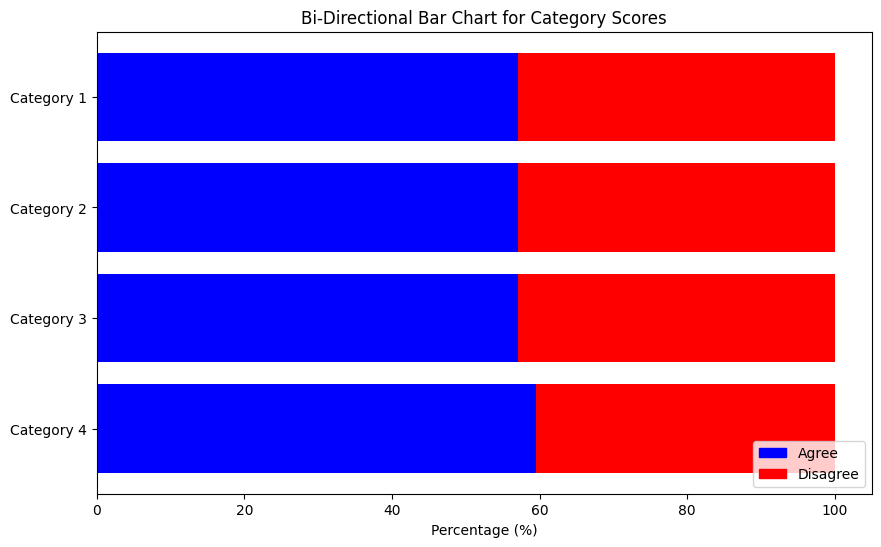

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace this with your actual data
# Each row represents a user, and each column represents a category score (1 to 7)
# The following is a sample data structure
data = [
    [1, 2, 3, 4],
    [7, 6, 5, 4],
    [3, 3, 4, 4],
    [5, 5, 4, 5],
    [2, 3, 2, 1],
    [6, 5, 6, 7]
]

# Categories and their corresponding labels
categories = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
labels = ['Strongly Prefer (Traditional Approach)', 'Prefer', 'Slightly Prefer', 'Slightly Prefer', 'Prefer', 'Strongly Prefer (Room Dreaming Approach)']

# Calculate the percentage for each score (1 to 7)
scores = np.array(data)
total_scores = scores.sum(axis=0)
percentage_scores = (total_scores / (len(data) * 7)) * 100

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars
for i, category in enumerate(categories):
    ax.barh(i, percentage_scores[i], align='center', color='blue', label='Agree')
    ax.barh(i, 100 - percentage_scores[i], left=percentage_scores[i], align='center', color='red', label='Disagree')

# Set labels and title
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories)
ax.set_xlabel('Percentage (%)')
ax.set_title('Bi-Directional Bar Chart for Category Scores')

# Invert y-axis to have the higher score at the top
ax.invert_yaxis()

# Create custom legend
handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label='Agree'),
           plt.Rectangle((0, 0), 1, 1, color='red', label='Disagree')]
ax.legend(handles=handles, loc='lower right')

# Show the plot
plt.show()



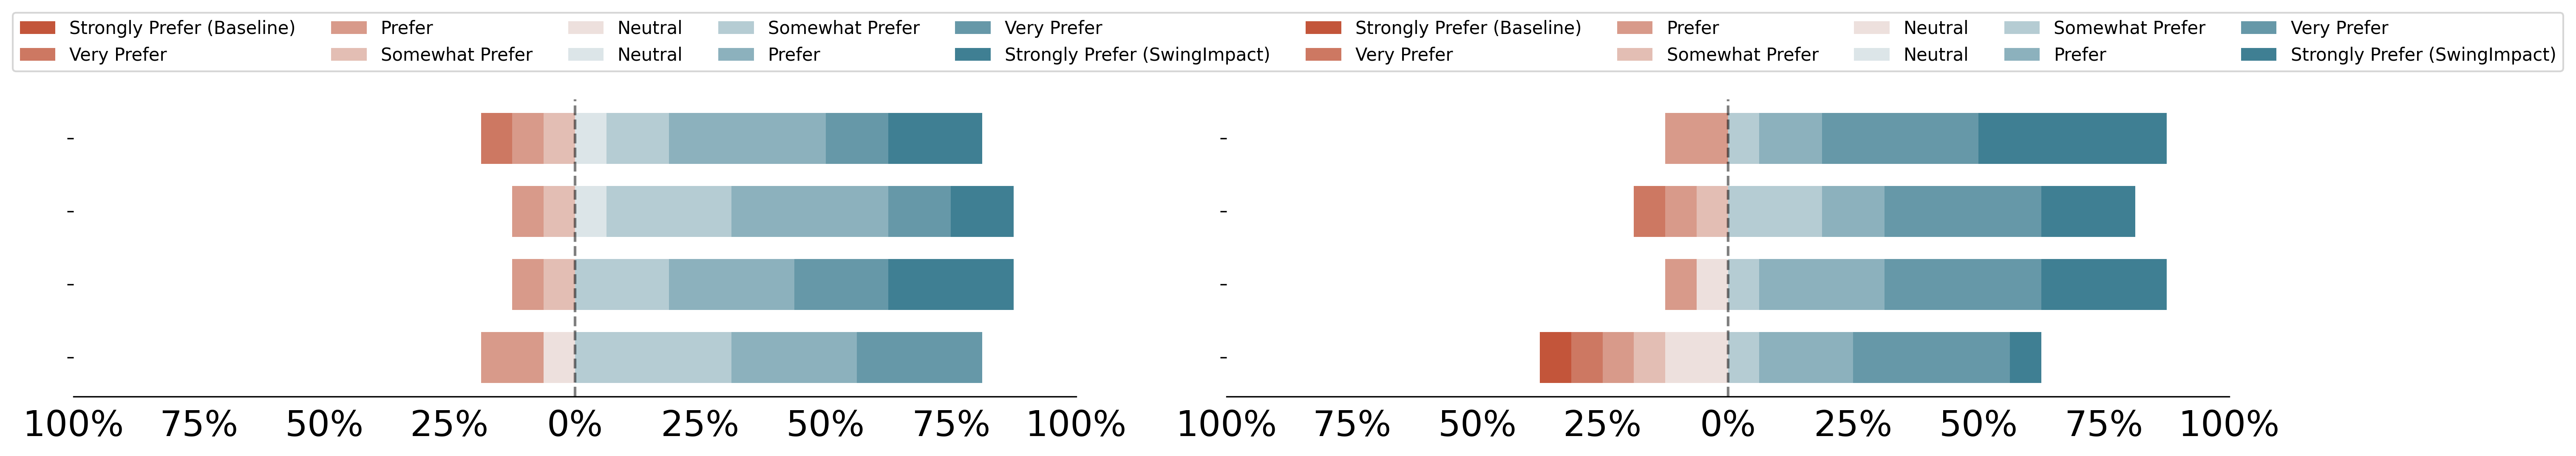

In [ ]:
## Partial (Selected) Plot ##
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open_by_key('1SI2swQW24s08hsELXPcOdng0B3UYhZo5NR8dlx4Gox4').worksheet("Ratings")

datas = np.array(worksheet.get_all_values()[3:])
user_count = datas.shape[0]

import collections
def user_counting(data_column):
  counter = collections.Counter(data_column)
  count_list = []
  for i in range(1,11):
    count_list.append(counter.get(str(i), 0))
  user_num = sum(count_list)
  for i in range(10):
    count_list[i] = count_list[i] / user_num
  A_sum = sum(count_list[:5])
  B_sum = sum(count_list[5:])
  return count_list

category_names = ['Strongly Prefer (Baseline)', 'Very Prefer', 'Prefer', 'Somewhat Prefer', 'Neutral', 'Neutral', 'Somewhat Prefer', 'Prefer', 'Very Prefer', 'Strongly Prefer (SwingImpact)']
defend = {
    'Immersion': user_counting(datas[:,1]),
    'Realism': user_counting(datas[:,2]),
    'Consistency': user_counting(datas[:,3]),
    'Fun': user_counting(datas[:,4])
}

attack = {
    'Immersion': user_counting(datas[:,7]),
    'Realism': user_counting(datas[:,8]),
    'Consistency': user_counting(datas[:,9]),
    'Fun': user_counting(datas[:,10])
}

results = [defend, attack]

def survey(results, category_names):

    fig, axes = plt.subplots(1,2, figsize=(18, 3), dpi=300)

    for k in range(2):
        labels = list(results[k].keys())
        data = np.array(list(results[k].values()))
        data_cum = data.cumsum(axis=1)
        middle_index = data.shape[1]//2
        offsets = data[:, range(middle_index)].sum(axis=1)

        # Color Mapping
        colors = np.flip(sns.diverging_palette(220, 20, n=data.shape[1]), 0)

        # Plot Bars
        for i, (colname, color) in enumerate(zip(category_names, colors)):
            widths = data[:, i]
            starts = data_cum[:, i] - widths - offsets
            rects = axes[k].barh(labels, widths, left=starts, height=0.7,
                            label=colname, color=color)

        # Add Zero Reference Line
        axes[k].axvline(0, linestyle='--', color='black', alpha=.5)

        # X Axis
        axes[k].set_xlim(-1., 1.)
        axes[k].set_xticks(np.arange(-1., 1.25, 0.25))
        # axes[k].xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
        axes[k].set_xticklabels(['100%', '75%', '50%', '25%', '0%', '25%', '50%', '75%', '100%'])
        axes[k].set_yticklabels([])
        axes[k].tick_params(axis='x', which='both', color=[0,0,0,0], labelsize=20)

        # Y Axis
        axes[k].invert_yaxis()

        # Remove spines
        axes[k].spines['right'].set_visible(False)
        axes[k].spines['top'].set_visible(False)
        axes[k].spines['left'].set_visible(False)

    # Legend
    fig.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
            loc='lower left', fontsize='medium').set_zorder(3)
    # handles, labels = axes[0].get_legend_handles_labels()
    # plt.legend(handles, labels, ncol=len(category_names), loc='center', fontsize='medium')

    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, axes

fig, axes = survey(results, category_names)
fig.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=-3)

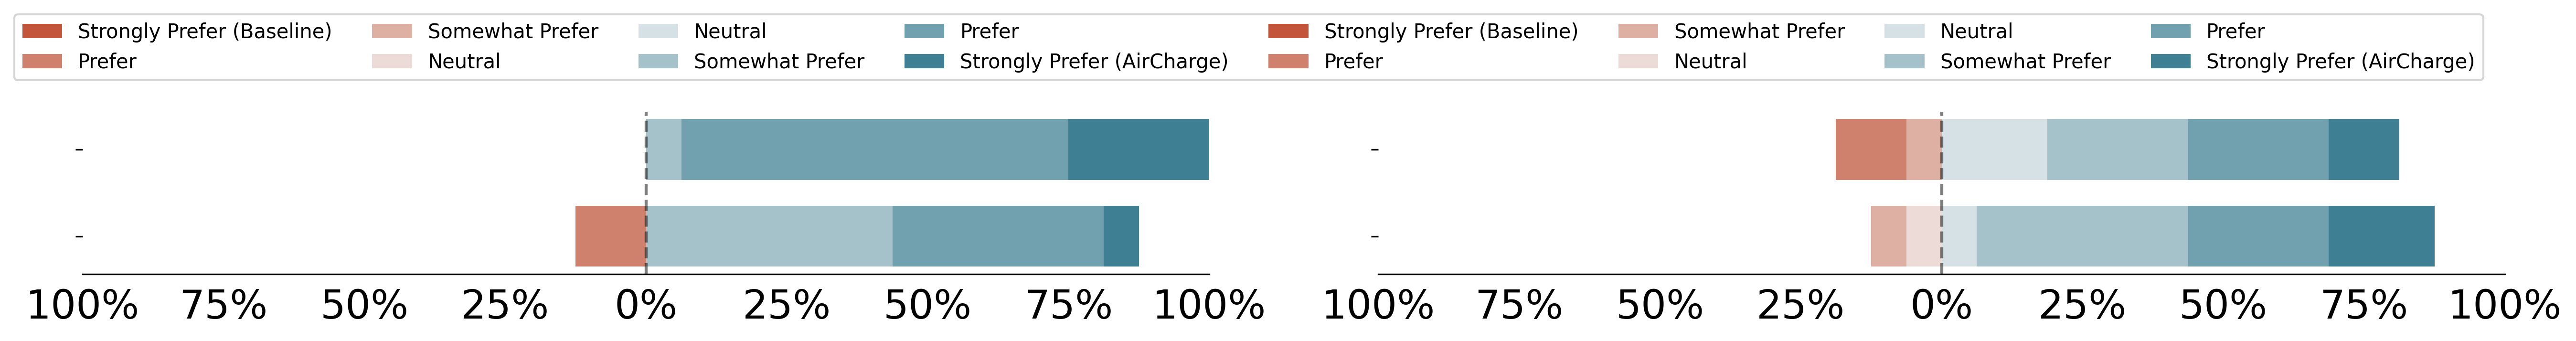

In [ ]:
## Sample Code ##
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


category_names = ['Strongly Prefer (Baseline)', 'Prefer', 'Somewhat Prefer', 'Neutral', 'Neutral', 'Somewhat Prefer', 'Prefer', 'Strongly Prefer (AirCharge)']

defend = {
    'Shotgun': [0, 0, 0, 0, 0, 0.0625, 0.6875, 0.25],
    'Machine gun': [0, 0.125, 0, 0, 0, 0.4375, 0.375, 0.0625]
}
attack = {
    'Shotgun': [0, 0.125, 0.0625, 0, 0.1875, 0.25, 0.25, 0.125],
    'Machine gun': [0, 0, 0.0625, 0.0625, 0.0625, 0.375, 0.25, 0.1875]
}
results = [defend, attack]

def survey(results, category_names):

    fig, axes = plt.subplots(1,2, figsize=(18, 1.8), dpi=300)

    for k in range(2):
        labels = list(results[k].keys())
        data = np.array(list(results[k].values()))
        data_cum = data.cumsum(axis=1)
        middle_index = data.shape[1]//2
        offsets = data[:, range(middle_index)].sum(axis=1)

        # Color Mapping
        colors = np.flip(sns.diverging_palette(220, 20, n=data.shape[1]), 0)

        # Plot Bars
        for i, (colname, color) in enumerate(zip(category_names, colors)):
            widths = data[:, i]
            starts = data_cum[:, i] - widths - offsets
            rects = axes[k].barh(labels, widths, left=starts, height=0.7,
                            label=colname, color=color)

        # Add Zero Reference Line
        axes[k].axvline(0, linestyle='--', color='black', alpha=.5)

        # X Axis
        axes[k].set_xlim(-1., 1.)
        axes[k].set_xticks(np.arange(-1., 1.25, 0.25))
        # axes[k].xaxis.set_major_formatter(mpl.ticker.PercentFormatter(1))
        axes[k].set_xticklabels(['100%', '75%', '50%', '25%', '0%', '25%', '50%', '75%', '100%'])
        axes[k].set_yticklabels([])
        axes[k].tick_params(axis='x', which='both', color=[0,0,0,0], labelsize=20)

        # Y Axis
        axes[k].invert_yaxis()

        # Remove spines
        axes[k].spines['right'].set_visible(False)
        axes[k].spines['top'].set_visible(False)
        axes[k].spines['left'].set_visible(False)

    # Legend
    fig.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
            loc='lower left', fontsize='medium').set_zorder(3)
    # handles, labels = axes[0].get_legend_handles_labels()
    # plt.legend(handles, labels, ncol=len(category_names), loc='center', fontsize='medium')

    # Set Background Color
    fig.set_facecolor('#FFFFFF')

    return fig, axes

fig, axes = survey(results, category_names)
fig.tight_layout()
plt.subplots_adjust(wspace=0.15, hspace=-3)
plt.savefig(f'./Likert_test.png')
# plt.show()